In [22]:
from io import StringIO
from pathlib import Path
import numpy as np
import pandas as pd

MODEL_PATH = Path("/scratch/jgut/ProteinMPNN_models/")

def load_distance_matrix(matrix_path:Path):
    alphabet = 'ACDEFGHIKLMNPQRSTVWYX'
    if matrix_path is None:
        identity_matrix = [[0 if ending_letter==starting_letter else 1 for ending_letter in alphabet] for starting_letter in alphabet]
        return identity_matrix
    with open(matrix_path, "r") as f:
        lines = f.readlines()
    lines = r"".join([line for line in lines if line[0]!= "#"]).replace("  ", " ").replace("  ", " ")
    blosum_string = StringIO(lines)
    df = pd.read_csv(blosum_string, sep=" ", index_col=0).to_dict()
    #df["X"]["X"] = max(1,df["X"]["X"])
    return df
    #return np.array([[df[start][end] for end in alphabet] for start in alphabet])

BLOSUM60_DISTANCE = load_distance_matrix("/scratch/jgut/blosum_distance/matrices/blosum62_distance.mat")

def compute_distance(target:str, prediction:str, average=True, distance:dict=BLOSUM60_DISTANCE, exponent:float=1.0):
    output_distance = np.sum([distance[si][sj]**exponent for si,sj in zip(target,prediction)])
    if average:
        return (output_distance/len(target))**float(1./exponent)
    return output_distance**float(1./exponent)

test_path = Path("/scratch/jgut/ProteinMPNN_models/0.001_8/output/epoch10_step14942/1ABO_A/seqs/1ABO_A.fa")

def read_fasta_sequences(fasta_path:Path):
    with open(fasta_path, 'r') as fasta_file:
        lines = [line.strip() for line in fasta_file.readlines()]
    return lines[1], lines[3]

def compute_similarity_score(target:str, prediction:str):
    score = 0
    for it, target_char in enumerate(target):
        if target_char==prediction[it]:
            score+=1
    return score/len(target)

def main():
    scores = []
    for configuration_path in MODEL_PATH.glob("0*"):
        print(configuration_path)
        learning_rate, alpha = str(configuration_path.name).split("_")
        for epoch_path in (configuration_path/"output").glob("epoch*"):
            print(epoch_path)
            epoch = str(epoch_path.name).split("_")[0][len("epoch"):]
            for example_path in epoch_path.glob("*"):
                print(example_path)
                example = example_path.name
                target_sequence, predicted_sequence = read_fasta_sequences(example_path/"seqs"/f"{example}.fa")
                similarity_score = compute_similarity_score(target_sequence, predicted_sequence)
                blosum1_distance=compute_distance(target_sequence, predicted_sequence, exponent=1)
                blosum2_distance=compute_distance(target_sequence, predicted_sequence, exponent=2)
                blosum4_distance=compute_distance(target_sequence, predicted_sequence, exponent=4)
                blosum8_distance=compute_distance(target_sequence, predicted_sequence, exponent=8)
                scores.append({"alpha":float(alpha), "learning_rate":float(learning_rate), "epoch":int(epoch), "example":example, "similarity_score":similarity_score,
                              "blosum1_distance": blosum1_distance, "blosum2_distance": blosum2_distance, "blosum4_distance": blosum4_distance,"blosum8_distance": blosum8_distance,})
    df = pd.DataFrame(scores)
    return df
df = main()

/scratch/jgut/ProteinMPNN_models/0.001_2
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch10_step14900
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch10_step14900/1ABO_A
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch10_step14900/1ABQ_A
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch10_step14900/1AWO_A
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch10_step14900/1BBZ_A
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch10_step14900/1DAN_T
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch10_step14900/1DAN_U
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch10_step14900/1GBQ_A
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch10_step14900/1GBR_A
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch10_step14900/1HIA_I
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch10_step14900/1JRH_I
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch10_step14900/1JU5_C
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch10_step14900/1KBH_B
/scratch/jgut/Pro

In [18]:
def main():
    scores = []
    for configuration_path in MODEL_PATH.glob("0*"):
        print(configuration_path)
        learning_rate, alpha = str(configuration_path.name).split("_")
        for epoch_path in (configuration_path/"output").glob("epoch*"):
            print(epoch_path)
            epoch = str(epoch_path.name).split("_")[0][len("epoch"):]
            print(epoch)
main()

/scratch/jgut/ProteinMPNN_models/0.001_2
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch10_step14900
10
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch20_step29806
20
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch30_step44736
30
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch40_step59614
40
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch50_step74546
50
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch60_step89510
60
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch70_step104398
70
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch80_step119318
80
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch90_step134262
90
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch100_step149160
100
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch110_step164076
110
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch120_step179020
120
/scratch/jgut/ProteinMPNN_models/0.001_2/output/epoch130_step193898
130
/scratch/jgut/ProteinMPNN_models/0.001_2/output

In [16]:
df

,alpha,learning_rate,epoch,example,similarity_score,blosum1_distance,blosum2_distance,blosum4_distance,blosum8_distance
0,2,0.001,[],1ABO_A,0.396552,3.103448,4.350981,5.655759,7.405049
1,2,0.001,[],1ABQ_A,0.375000,3.232143,4.434040,5.572130,6.730543
2,2,0.001,[],1AWO_A,0.210526,4.192982,5.041929,5.877578,6.811127
3,2,0.001,[],1BBZ_A,0.465517,2.810345,4.216143,5.710542,7.540339
4,2,0.001,[],1DAN_T,0.360000,3.320000,4.458699,5.495935,6.471690
...,...,...,...,...,...,...,...,...,...
30099,8,0.0001,[],6KBR_C,0.345455,4.872727,6.214353,7.279179,8.348802
30100,8,0.0001,[],6P6B_A,0.100000,7.122222,7.907099,8.712607,9.562177
30101,8,0.0001,[],6PNW_A,0.306452,5.838710,7.257921,8.353723,9.262362
30102,8,0.0001,[],6PNW_B,0.306452,5.806452,7.193187,8.261242,9.151114


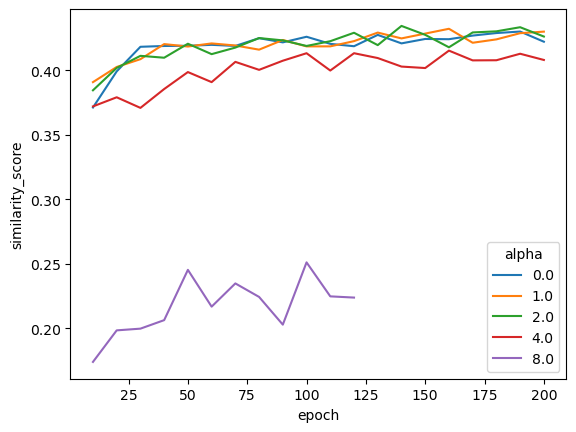

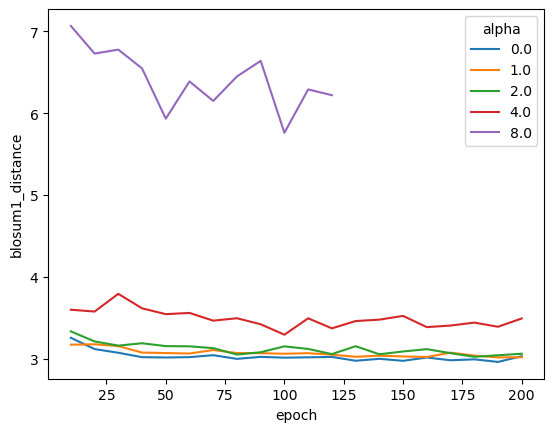

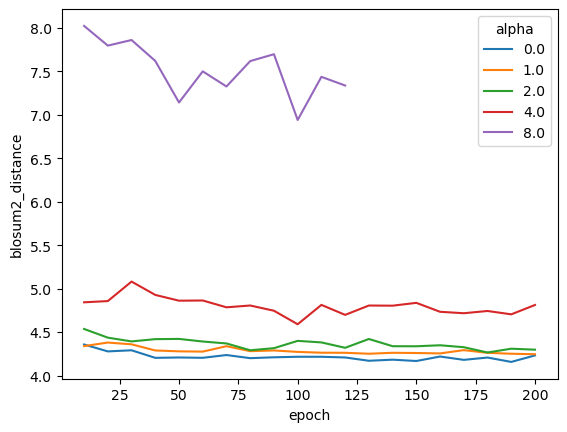

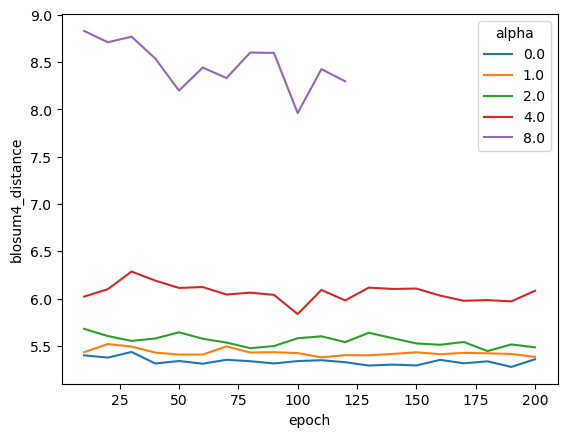

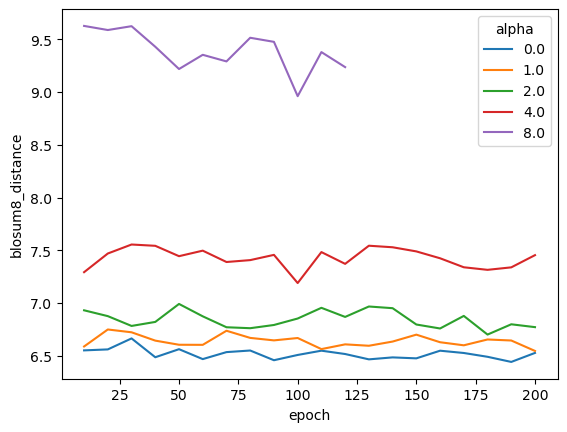

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
agg_df = (
    df[["learning_rate", "alpha", "epoch", "similarity_score","blosum1_distance","blosum2_distance","blosum4_distance","blosum8_distance"]].groupby(["learning_rate", "alpha", "epoch"])
      .agg("mean")
      .reset_index()
)
corr_learning_rate = agg_df[agg_df.learning_rate==0.00100]
scores = ["similarity_score","blosum1_distance","blosum2_distance","blosum4_distance","blosum8_distance"]
for score in scores:
    sns.lineplot(data=corr_learning_rate, x="epoch", y=score, hue="alpha", palette="tab10")
    plt.show()